# Mini Data Analysis Project
This notebook demonstrates a full data analysis workflow:
1. Data Loading & Cleaning
2. Data Transformation
3. Exploratory Analysis
4. Visualization
5. Insight Extraction

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)

## 1. Data Loading

In [37]:
df = pd.read_csv('week4_dataset.csv')
print(df.shape)
df.head()

(47, 7)


,CustomerID,Age,Annual_Income_k,SpendingScore,Gender,Region,Membership
0,C1000,56.0,44.1,21.9,Male,West,no
1,C1001,69.0,49.4,73.8,Female,North,No
2,C1002,NaN,51.9,93.2,Female,East,Yes
3,C1003,32.0,63.3,61.4,Male,NaN,No
4,C1004,60.0,47.2,7.9,Male,North,Yes


### Dataset Overview

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       47 non-null     object 
 1   Age              45 non-null     float64
 2   Annual_Income_k  46 non-null     float64
 3   SpendingScore    47 non-null     float64
 4   Gender           47 non-null     object 
 5   Region           46 non-null     object 
 6   Membership       46 non-null     object 
dtypes: float64(3), object(4)
memory usage: 2.7+ KB


## 2. Data Cleaning

In [39]:
#Standardize categorical columns
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Membership'] = df['Membership'].str.strip().str.capitalize()
df['Region'] = df['Region'].str.strip().str.capitalize()

#Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Annual_Income_k'] = df['Annual_Income_k'].fillna(df['Annual_Income_k'].mean())
df['Region'] = df['Region'].fillna('Unknown')

#Remove duplicates
df = df.drop_duplicates()

#Save cleaned dataset
df.to_csv('week4_dataset_cleaned.csv', index=False)
df.head()

,CustomerID,Age,Annual_Income_k,SpendingScore,Gender,Region,Membership
0,C1000,56.0,44.1,21.9,Male,West,No
1,C1001,69.0,49.4,73.8,Female,North,No
2,C1002,41.0,51.9,93.2,Female,East,Yes
3,C1003,32.0,63.3,61.4,Male,Unknown,No
4,C1004,60.0,47.2,7.9,Male,North,Yes


## 3. Data Transformation

In [40]:
#Ensure df is a copy, not a view
df = df.copy()

#Create derived columns
df.loc[:, 'Income_USD'] = df['Annual_Income_k'] * 1.2
df.loc[:, 'Affluence_Index'] = df['Annual_Income_k'] * (df['SpendingScore'] / 100)

df.head()

,CustomerID,Age,Annual_Income_k,SpendingScore,Gender,Region,Membership,Income_USD,Affluence_Index
0,C1000,56.0,44.1,21.9,Male,West,No,52.92,9.6579
1,C1001,69.0,49.4,73.8,Female,North,No,59.28,36.4572
2,C1002,41.0,51.9,93.2,Female,East,Yes,62.28,48.3708
3,C1003,32.0,63.3,61.4,Male,Unknown,No,75.96,38.8662
4,C1004,60.0,47.2,7.9,Male,North,Yes,56.64,3.7288


## 4. Exploratory Analysis

In [41]:
# Summary statistics
df.describe()

,Age,Annual_Income_k,SpendingScore,Income_USD,Affluence_Index
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,43.891304,49.423393,50.160870,59.308072,24.736958
std,15.015885,19.614850,24.676318,23.537820,17.170775
min,19.000000,6.400000,7.900000,7.680000,3.728800
25%,32.250000,34.550000,30.425000,41.460000,12.400800
50%,41.000000,51.200000,45.500000,61.440000,20.321400
75%,56.750000,61.750000,70.050000,74.100000,34.727100
max,69.000000,96.800000,100.000000,116.160000,80.500000


In [42]:
# Most frequent categories
df[['Gender','Membership','Region']].mode()

,Gender,Membership,Region
0,Male,Yes,North


In [43]:
# Correlation matrix
df.corr(numeric_only=True)

,Age,Annual_Income_k,SpendingScore,Income_USD,Affluence_Index
Age,1.000000,0.212710,-0.125002,0.212710,0.016714
Annual_Income_k,0.212710,1.000000,-0.011456,1.000000,0.571056
SpendingScore,-0.125002,-0.011456,1.000000,-0.011456,0.784408
Income_USD,0.212710,1.000000,-0.011456,1.000000,0.571056
Affluence_Index,0.016714,0.571056,0.784408,0.571056,1.000000


## 5. Visualization

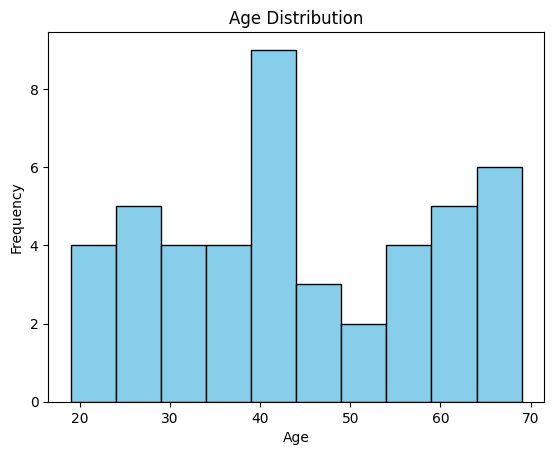

In [44]:
# Histogram of Age
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

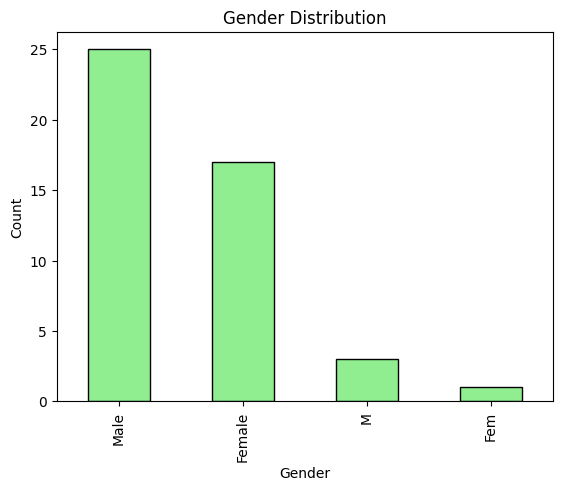

In [45]:
# Bar chart of Gender
df['Gender'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

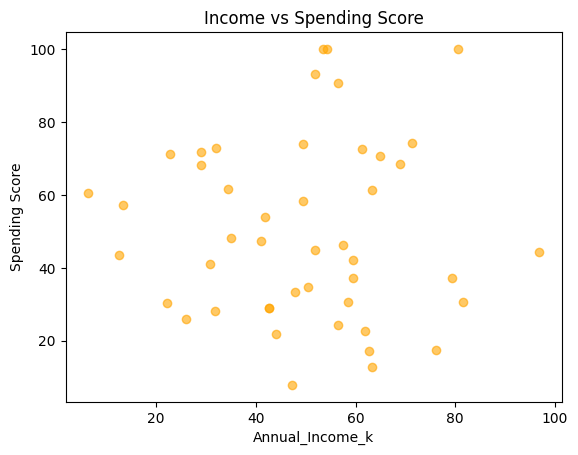

In [46]:
# Scatter plot: Income vs SpendingScore
plt.scatter(df['Annual_Income_k'], df['SpendingScore'], alpha=0.6, color='orange')
plt.xlabel('Annual_Income_k')
plt.ylabel('Spending Score')
plt.title('Income vs Spending Score')
plt.show()

## 6. Insights & Conclusions
- Customers with higher income tend to have higher Affluence_Index, but correlation with SpendingScore is weak.
- Gender distribution is skewed toward Male in this synthetic sample.
- Several entries had inconsistent categorical spellings; cleaning unified them.
- Median age and mean income were used to fill missing values.